In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_df = pd.read_csv("ExtraData.csv")
final_df.head()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bolivia,Uruguay,59,22,1,67,79,67,69,68,80,83,79
1,Brazil,Mexico,8,14,2,86,79,86,86,85,77,79,78
2,Ecuador,Venezuela,35,94,1,71,68,71,75,75,72,75,73
3,Paraguay,Argentina,67,5,0,74,81,75,78,74,83,88,85
4,Sweden,Switzerland,4,3,0,76,81,77,81,78,78,76,79


In [3]:
#previous 0-Loss, 1-Win, 2-Draw
#Current 0-Loss, 1-Draw, 2-Win
final_df['Team1_Result'] = final_df['Team1_Result'].map({0:0,1:2,2:1})

In [4]:
final_df.head()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bolivia,Uruguay,59,22,2,67,79,67,69,68,80,83,79
1,Brazil,Mexico,8,14,1,86,79,86,86,85,77,79,78
2,Ecuador,Venezuela,35,94,2,71,68,71,75,75,72,75,73
3,Paraguay,Argentina,67,5,0,74,81,75,78,74,83,88,85
4,Sweden,Switzerland,4,3,0,76,81,77,81,78,78,76,79


### Modelling

In [5]:
#Saving DF for creating a pipeline model
pipe_DF = final_df
#Create dummies for categorical columns to verify the accuracy percentages
final_df = pd.get_dummies(final_df)

In [6]:
#split X and y and train test split (For League Matches)
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
#Validtion and test set
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [8]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def regression_metrics(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
    print("MSE: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print("R2 Score:{}".format(r2_score(y_test,y_pred)))

In [10]:
from sklearn.linear_model import LinearRegression
regression_metrics(LinearRegression())

MAE: 2427442596.086856
MSE: 59852185292.395065
R2 Score:-4.6793597738840485e+21


In [11]:
from sklearn.tree import DecisionTreeRegressor
regression_metrics(DecisionTreeRegressor())

MAE: 0.7073650339649624
MSE: 1.0290298321349427
R2 Score:-0.383191605424426


In [12]:
from sklearn.tree import ExtraTreeRegressor
regression_metrics(ExtraTreeRegressor())

MAE: 0.6903825527350733
MSE: 1.0185971832211547
R2 Score:-0.35528725886441603


In [13]:
from xgboost import XGBRegressor
regression_metrics(XGBRegressor(learning_rate=0.1))

C:\Users\Solo\anaconda3\envs\DeepLearning\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


MAE: 0.6142956649895902
MSE: 0.7348827883476061
R2 Score:0.29455596493447467


In [14]:
from sklearn.linear_model import ElasticNet
regression_metrics(ElasticNet(l1_ratio=0.1))

MAE: 0.6951499895812254
MSE: 0.7817269359570289
R2 Score:0.2017543378182869


In [15]:
from sklearn.linear_model import Ridge
regression_metrics(Ridge())

MAE: 0.6153859444889038
MSE: 0.7363347468961507
R2 Score:0.29176562236741577


In [16]:
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
regression_metrics(RandomForestRegressor())

MAE: 0.6188580735595394
MSE: 0.7576810965438167
R2 Score:0.25010696818519007


In [17]:
regression_metrics(AdaBoostRegressor())

MAE: 0.674502681419323
MSE: 0.7599358628082905
R2 Score:0.24563714737356712


In [18]:
regression_metrics(ExtraTreesRegressor())

MAE: 0.6183827910856871
MSE: 0.7927025763601311
R2 Score:0.17918184594026854


In [19]:
regression_metrics(GradientBoostingRegressor())

MAE: 0.6211769642748117
MSE: 0.7338728998656849
R2 Score:0.296493499211253


In [20]:
#Initial impression with model - GradientBoostRegressor performed well than others, so we can validate with the holdout test

In [21]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_hold_test)
print("MAE: {}".format(mean_absolute_error(y_hold_test,y_pred)))
print("MSE: {}".format(np.sqrt(mean_squared_error(y_hold_test,y_pred))))
print("R2 Score:{}".format(r2_score(y_hold_test,y_pred)))

MAE: 0.6330127667264316
MSE: 0.7441144972465171
R2 Score:0.298998165694885


In [22]:
#find the min and max value of prediction
print(y_pred.min())
print(y_pred.max())

#Minimum and maximum values pretty much within our range.

-0.03971111801095273
2.0827801640822705


In [23]:
#Optionally we can clip the output data and verify the accuracy score and classification report using Classification models
y_clipped = np.clip(y_pred,0,2)

#Split probabilty equally to determine the win, lose or Draw 0-0.75 -> Loss(0), 0.76-1.25 ->Draw(1), 1.26-2 ->Win(2)
def probs(testvalue):
    if(testvalue >= 0 and testvalue<=0.75):
        return "0"
    if(testvalue >= 0.76 and testvalue<=1.25):
        return "1"
    else:
        return "2"

In [24]:
y_pred_classification = np.vectorize(probs)(y_clipped)
y_pred_classification = y_pred_classification.astype(int)

              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1045
           1       0.26      0.40      0.32       582
           2       0.70      0.58      0.64      1169

    accuracy                           0.55      2796
   macro avg       0.55      0.53      0.53      2796
weighted avg       0.60      0.55      0.57      2796



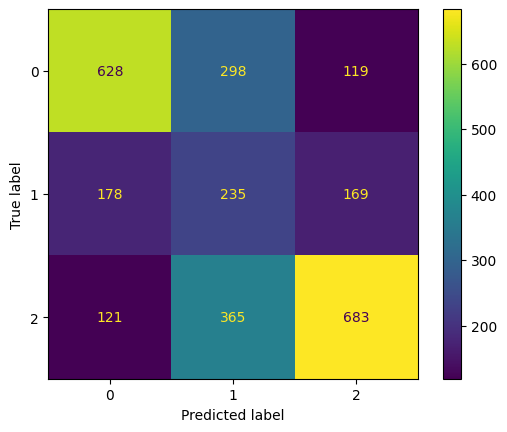

In [25]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_hold_test, y_pred_classification))
ConfusionMatrixDisplay.from_predictions(y_hold_test, y_pred_classification)

### Creating pipeline model for League matches

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

In [27]:
pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

In [28]:
from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),GradientBoostingRegressor())
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('gradientboostingregressor', GradientBoostingRegressor())])

#### Saving the league model

In [29]:
import joblib
joblib.dump(pipe_League,"League_model_regression.pkl")

['League_model_regression.pkl']

### Modelling Knockout model

In [30]:
#Predictions for Knockout Stage - Removing Draw status
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 1]

In [31]:
#previous 0-Loss, 2-Win
#Current 0-Loss, 1-Win
knock_df['Team1_Result'] = knock_df['Team1_Result'].map({0:0,2:1})

C:\Users\Solo\AppData\Local\Temp\ipykernel_7236\3542088693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knock_df['Team1_Result'] = knock_df['Team1_Result'].map({0:0,2:1})


In [32]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [33]:
regression_metrics(LinearRegression())

MAE: 8386087.262294708
MSE: 229158521.316794
R2 Score:-2.100545563826659e+17


In [34]:
regression_metrics(DecisionTreeRegressor())

MAE: 0.2969976905311778
MSE: 0.5443389108676014
R2 Score:-0.18521965239979976


In [35]:
regression_metrics(ExtraTreeRegressor())

MAE: 0.3087759815242494
MSE: 0.5551563872628205
R2 Score:-0.23279472028646375


In [36]:
regression_metrics(XGBRegressor(learning_rate=0.1))

C:\Users\Solo\anaconda3\envs\DeepLearning\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


MAE: 0.322700008170762
MSE: 0.41234985124750095
R2 Score:0.31987025560179727


In [37]:
regression_metrics(ElasticNet(l1_ratio=0.1))

MAE: 0.36949809768745434
MSE: 0.41977058269943707
R2 Score:0.29517048122824785


In [38]:
regression_metrics(Ridge())

MAE: 0.33584146226217626
MSE: 0.4086574195069035
R2 Score:0.33199631141202035


In [39]:
regression_metrics(RandomForestRegressor())

MAE: 0.32028903552182997
MSE: 0.42446513614832737
R2 Score:0.2793172390236518


In [40]:
regression_metrics(AdaBoostRegressor())

MAE: 0.3768782617306289
MSE: 0.42501553067560843
R2 Score:0.2774470405844488


In [41]:
regression_metrics(ExtraTreesRegressor())

MAE: 0.3112286374133949
MSE: 0.4408639691117544
R2 Score:0.22255567709160073


In [42]:
regression_metrics(GradientBoostingRegressor())

MAE: 0.32999672735458035
MSE: 0.4092936722702384
R2 Score:0.32991461639823527


In [43]:
#Initial impression with model - GradientBoostingRegressor performed well than others, so we can validate with the holdout test

In [44]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_hold_test)
print("MAE: {}".format(mean_absolute_error(y_hold_test,y_pred)))
print("MSE: {}".format(np.sqrt(mean_squared_error(y_hold_test,y_pred))))
print("R2 Score:{}".format(r2_score(y_hold_test,y_pred)))

MAE: 0.3219687901752654
MSE: 0.39931962393176296
R2 Score:0.36217535177198157


In [45]:
#find the min and max value of prediction
print(y_pred.min())
print(y_pred.max())

#Minimum and maximum values pretty much within our range.

-0.029762321967135706
1.075627034377782


In [46]:
#Optionally we can clip the output data and verify the accuracy score and classification report using Classification models
y_clipped = np.clip(y_pred,0,2)

#Split probabilty equally to determine the win, lose or Draw 0-0.5 -> Loss(0), 0.51-1 ->Win(1)
def probs(testvalue):
    if(testvalue >= 0 and testvalue<=0.5):
        return "0"
    else:
        return "1"

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1082
           1       0.76      0.78      0.77      1082

    accuracy                           0.77      2164
   macro avg       0.77      0.77      0.77      2164
weighted avg       0.77      0.77      0.77      2164



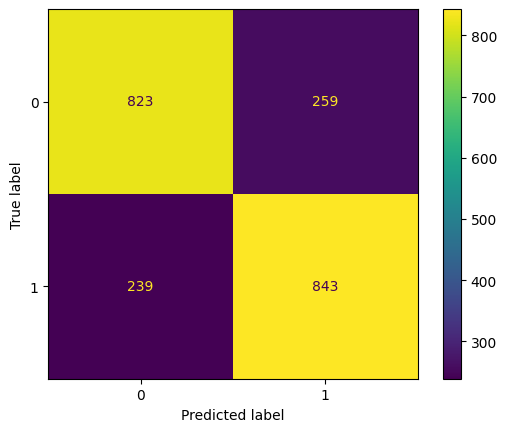

In [47]:
y_pred_classification = np.vectorize(probs)(y_clipped)
y_pred_classification = y_pred_classification.astype(int)
print(classification_report(y_hold_test, y_pred_classification))
ConfusionMatrixDisplay.from_predictions(y_hold_test, y_pred_classification)

### Creating pipeline model for Knockout matches

In [48]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),GradientBoostingRegressor())
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('gradientboostingregressor', GradientBoostingRegressor())])

#### Saving knockout model

In [49]:
joblib.dump(pipe_knock,"KnockOut_model_regression.pkl")

['KnockOut_model_regression.pkl']

# SIMULATOR

#### Load League, knockout models and column names

In [50]:
league_model = joblib.load("League_model_regression.pkl")
knockout_model = joblib.load("KnockOut_model_regression.pkl")
col_names = joblib.load("col_names.pkl")

#### Load current fifa rankings file

In [51]:
rankings = pd.read_csv("FifaRankings.csv")
rankings.head()

,Team,Rank,GK,DEF,ATT,MID
0,Brazil,1,89.0,84.8,86.3,85.5
1,Belgium,2,89.0,80.8,85.7,85.5
2,France,3,87.0,84.2,88.3,86.8
3,Argentina,4,84.0,82.2,89.0,84.0
4,England,5,83.0,85.0,88.0,84.0


#### Create a function to return dataframe of values when we input Team1 and Team2

In [52]:
def TeamList(Team1, Team2):
    Team1_FIFA_RANK = rankings[rankings["Team"] == Team1]['Rank'].to_list()[0]
    Team2_FIFA_RANK = rankings[rankings["Team"] == Team2]['Rank'].to_list()[0]
    Team1_Goalkeeper_Score = rankings[rankings["Team"] == Team1]['GK'].to_list()[0]
    Team1_Defense = rankings[rankings["Team"] == Team1]['DEF'].to_list()[0]
    Team1_Offense = rankings[rankings["Team"] == Team1]['ATT'].to_list()[0]
    Team1_Midfield = rankings[rankings["Team"] == Team1]['MID'].to_list()[0]
    Team2_Goalkeeper_Score = rankings[rankings["Team"] == Team2]['GK'].to_list()[0]
    Team2_Defense = rankings[rankings["Team"] == Team2]['DEF'].to_list()[0]
    Team2_Offense = rankings[rankings["Team"] == Team2]['ATT'].to_list()[0]
    Team2_Midfield = rankings[rankings["Team"] == Team2]['MID'].to_list()[0]
    list_value = [[Team1, Team2, Team1_FIFA_RANK, Team2_FIFA_RANK, Team1_Goalkeeper_Score, Team2_Goalkeeper_Score, Team1_Defense, Team1_Offense, Team1_Midfield, Team2_Defense, Team2_Offense, Team2_Midfield]]
    df = pd.DataFrame(data=list_value,columns=col_names)
    return df

In [53]:
#Checking the function is working fine
TeamList("Brazil", "Spain")

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Brazil,Spain,1,7,89.0,84.0,84.8,86.3,85.5,86.5,85.0,86.0


### Creating a function to return the League match result when Team1 and Team2 are inputed

In [54]:
#Team 1 0-Loss, 1-Draw, 2-Win
def league_model_result(Team1, Team2):
    result = league_model.predict(TeamList(Team1,Team2))
    result = np.clip(result,0,2)
    if result >= 0 and result<=0.75:
        return Team2, 2-result[0]
    if result >= 0.76 and result<=1.25:
        return "Draw", result[0]
    else:
        return Team1, result[0]

In [55]:
# checking if the function is working fine
league_model_result("Spain", "Argentina")

('Draw', 1.1012924480905317)

In [56]:
league_model_result("Japan", "Brazil")

('Brazil', 1.6102421789277144)

### Creating a function to return the Knockout match result when Team1 and Team2 are inputed

In [57]:
#Team1 - 'Win':1,'Lose':0
def knockout_result(Team1, Team2):
    result = knockout_model.predict(TeamList(Team1, Team2))
    result = np.clip(result,0,2)
    if result >= 0 and result<=0.5:
        return Team2, 1-result[0]
    else:
        return Team1, result[0]

In [58]:
# checking if the function is working fine
knockout_result("France", "Brazil")

('France', 0.5207261842467357)

In [59]:
knockout_result("Argentina", "Brazil")

('Brazil', 0.5781140710647121)

## Simulating League Rounds

### Function to simulate league round - All teams in the group will play against all other teams in the group and top 2 will be considered as winner

In [60]:
def League_round(Team1, Team2, Team3, Team4):
    match1 = league_model_result(Team1, Team2)
    match2 = league_model_result(Team1, Team3)
    match3 = league_model_result(Team1, Team4)
    match4 = league_model_result(Team2, Team3)
    match5 = league_model_result(Team2, Team4)
    match6 = league_model_result(Team3, Team4)
    Points = [match1[0],match2[0],match3[0],match4[0],match5[0],match6[0]]
    Team1_points = Points.count(Team1) * 3
    Team2_points = Points.count(Team2) * 3
    Team3_points = Points.count(Team3) * 3
    Team4_points = Points.count(Team4) * 3
    if match1 == "Draw":
        Team1_points,Team2_points = Team1_points+1,Team2_points+1
    if match2 == "Draw":
        Team1_points,Team3_points = Team1_points+1,Team3_points+1
    if match3 == "Draw":
        Team1_points,Team4_points = Team1_points+1,Team4_points+1
    if match4 == "Draw":
        Team2_points,Team3_points = Team2_points+1,Team3_points+1
    if match5 == "Draw":
        Team2_points,Team4_points = Team2_points+1,Team4_points+1
    if match6 == "Draw":
        Team3_points,Team4_points = Team3_points+1,Team4_points+1
    dict = {Team1:Team1_points,Team2:Team2_points,Team3:Team3_points,Team4:Team4_points}
    grp_winners = pd.DataFrame(list(dict.items()),columns=['Team','Points']).sort_values('Points',ascending=False)[0:2]
    return grp_winners

In [61]:
#checking if function is working fine
League_round("Qatar", "Ecuador","Senegal","Netherlands")

,Team,Points
3,Netherlands,9
2,Senegal,6


### Simulating League round results

In [62]:
Group_A_Winners = League_round("Qatar", "Ecuador","Senegal","Netherlands")
Group_A_Winners.reset_index()

,index,Team,Points
0,3,Netherlands,9
1,2,Senegal,6


In [63]:
Group_B_Winners = League_round("England","IR Iran", "USA", "Wales")
Group_B_Winners.reset_index()

,index,Team,Points
0,0,England,9
1,2,USA,3


In [64]:
Group_C_Winners = League_round("Argentina","Saudi Arabia", "Mexico","Poland")
Group_C_Winners.reset_index()

,index,Team,Points
0,0,Argentina,9
1,2,Mexico,3


In [65]:
Group_D_Winners = League_round("France","Australia","Denmark","Tunisia")
Group_D_Winners.reset_index()

,index,Team,Points
0,0,France,9
1,2,Denmark,6


In [66]:
Group_E_Winners = League_round("Spain","Costa Rica","Germany","Japan")
Group_E_Winners.reset_index()

,index,Team,Points
0,0,Spain,6
1,2,Germany,6


In [67]:
Group_F_Winners = League_round("Belgium","Canada","Morocco","Croatia")
Group_F_Winners.reset_index()

,index,Team,Points
0,0,Belgium,6
1,2,Morocco,3


In [68]:
Group_G_Winners = League_round("Brazil","Serbia","Switzerland","Cameroon")
Group_G_Winners.reset_index()

,index,Team,Points
0,0,Brazil,9
1,1,Serbia,3


In [69]:
Group_H_Winners = League_round("Portugal","Ghana","Uruguay","Korea Republic")
Group_H_Winners.reset_index()

,index,Team,Points
0,0,Portugal,6
1,2,Uruguay,6


### Simulating Knockout matches -Round of 16

In [70]:
#Grp1A, Grp2B
W49 = knockout_result(Group_A_Winners['Team'].iloc[0], Group_B_Winners['Team'].iloc[1])
W49

('Netherlands', 0.7469594859082042)

In [71]:
#Grp1C, Grp2D
W50 = knockout_result(Group_C_Winners['Team'].iloc[0], Group_D_Winners['Team'].iloc[1])
W50

('Argentina', 0.6981700695706069)

In [72]:
#Grp1B, Grp2A
W51 = knockout_result(Group_B_Winners['Team'].iloc[0], Group_A_Winners['Team'].iloc[1])
W51

('England', 0.7859702953197453)

In [73]:
#Grp1D, Grp2C
W52 = knockout_result(Group_D_Winners['Team'].iloc[0], Group_C_Winners['Team'].iloc[1])
W52

('France', 0.7865684984424683)

In [74]:
#Grp1E, Grp2F
W53 = knockout_result(Group_E_Winners['Team'].iloc[0], Group_F_Winners['Team'].iloc[1])
W53

('Spain', 0.7597821233509373)

In [75]:
#Grp1G, Grp2H
W54 = knockout_result(Group_G_Winners['Team'].iloc[0], Group_H_Winners['Team'].iloc[1])
W54

('Brazil', 0.7428515591979341)

In [76]:
#Grp1F, Grp2E
W55 = knockout_result(Group_F_Winners['Team'].iloc[0], Group_E_Winners['Team'].iloc[1])
W55

('Belgium', 0.5260419774528696)

In [77]:
#Grp1H, Grp2G
W56 = knockout_result(Group_H_Winners['Team'].iloc[0], Group_G_Winners['Team'].iloc[1])
W56

('Portugal', 0.6637506751500115)

### Round of 16 Winners

In [78]:
print("",W49,"\n",W50,"\n",W51,"\n",W52,"\n",W53,"\n",W54,"\n",W55,"\n",W56)

 ('Netherlands', 0.7469594859082042) 
 ('Argentina', 0.6981700695706069) 
 ('England', 0.7859702953197453) 
 ('France', 0.7865684984424683) 
 ('Spain', 0.7597821233509373) 
 ('Brazil', 0.7428515591979341) 
 ('Belgium', 0.5260419774528696) 
 ('Portugal', 0.6637506751500115)


### Simulating Round of 8 - QuaterFinals

In [79]:
#W49, W50
W57 = knockout_result(W49[0], W50[0])
W57

('Argentina', 0.5786683620267639)

In [80]:
#W53, W54
W58 = knockout_result(W53[0], W54[0])
W58

('Brazil', 0.5961038395089375)

In [81]:
#W51, W52
W59 = knockout_result(W51[0], W52[0])
W59

('France', 0.5642154253007614)

In [82]:
#W55, W56
W60 = knockout_result(W55[0], W56[0])
W60

('Portugal', 0.5237989332747264)

### QuaterFinals Winners

In [83]:
print("",W57,"\n",W58,"\n",W59,"\n",W60)

 ('Argentina', 0.5786683620267639) 
 ('Brazil', 0.5961038395089375) 
 ('France', 0.5642154253007614) 
 ('Portugal', 0.5237989332747264)


### Simulating SemiFinals

In [84]:
#W57,W58
final1 = knockout_result(W57[0], W58[0])
final1

('Brazil', 0.5781140710647121)

In [85]:
#W59,W60
final2 = knockout_result(W59[0], W60[0])
final2

('France', 0.5868631249553169)

### SemiFinals Winner

In [86]:
print("",final1,"\n",final2)

 ('Brazil', 0.5781140710647121) 
 ('France', 0.5868631249553169)


### 3rd place Match

In [87]:
team1 = list([W57[0], W58[0]])
team1.remove(final1[0])
team1 = team1[0]
team1

'Argentina'

In [88]:
team2 = list([W59[0], W60[0]])
team2.remove(final2[0])
team2 = team2[0]
team2

'Portugal'

In [89]:
thirdPlace = knockout_result(team1,team2)
thirdPlace

('Portugal', 0.5451011288443868)

## FINALS 

In [90]:
Finals = knockout_result(final1[0], final2[0])
Finals

('France', 0.5069115682070551)

In [91]:
Runner= list([final1[0], final2[0]])
Runner.remove(Finals[0])
Runner = Runner[0]
Runner

'Brazil'

In [92]:
print("Winner is {}".format(Finals[0]))
print("2nd Place is {}".format(Runner))
print("3rd Place is {}".format(thirdPlace[0]))

Winner is France
2nd Place is Brazil
3rd Place is Portugal


### League matches winning probability varies till 2

##### Team1 Lose = 0 - 0.75
##### Draw = 0.76- 1.25
##### Team1 Win = 1.26 - 2

### Knockout matches probability is 1